## Customer Segmentation

Problem Statement- Segment the customers visiting shopping mall based on Recency,Frequency & Monetary value (RFM score)

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set
df = pd.read_csv(r'G:\My Drive\Professional\Data Science\Projects\Customer Segmentation\shopping_mall.csv',encoding = 'unicode_escape',parse_dates = ['InvoiceDate'])

### Exploratory Data Analysis

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2010-12-02 10:53:00,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-02 10:53:00,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,2010-12-02 10:53:00,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,2010-12-02 10:53:00,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,2010-12-02 10:53:00,12.75,15658.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    75120 non-null  object        
 1   StockCode    75120 non-null  object        
 2   Description  74915 non-null  object        
 3   Quantity     75120 non-null  int64         
 4   InvoiceDate  75120 non-null  datetime64[ns]
 5   UnitPrice    75120 non-null  float64       
 6   CustomerID   48212 non-null  float64       
 7   Country      75120 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.6+ MB


* ***Dataset contains 75120 invoice records and 8 columns***
* ***Missing values are present in Description and CustomerID columns***

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,75120.000000,75120.00000,48212.000000
mean,9.043384,5.25234,15257.869327
std,387.339709,116.75314,1765.475916
min,-74215.000000,0.00000,12346.000000
25%,1.000000,1.25000,13767.000000
50%,3.000000,2.46000,15078.000000
75%,9.000000,4.24000,16916.000000
max,74215.000000,16888.02000,18283.000000


* ***Negative quantities are present in the data.Needs to be evaluated further.***
* ***Some items are free (zero priced)***
* ***Median UnitPrice of the products is 2.46***

In [6]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
InvoiceNo,75120,3477,537666,536
StockCode,75120,3160,85123A,395
Description,74915,3080,WHITE HANGING HEART T-LIGHT HOLDER,402
Country,75120,30,United Kingdom,68591


* ***Multiple instances of same InvoiceNo exists.***
* ***3477 unique Invoices are present in the data***
* ***Data is present for 30 unique countries***

In [7]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2010-12-02 10:53:00'), Timestamp('2011-06-08 12:21:00'))

* ***Invoice data is present for duration between 02/Dec/2010 and 08/06/2011 - 7 months***

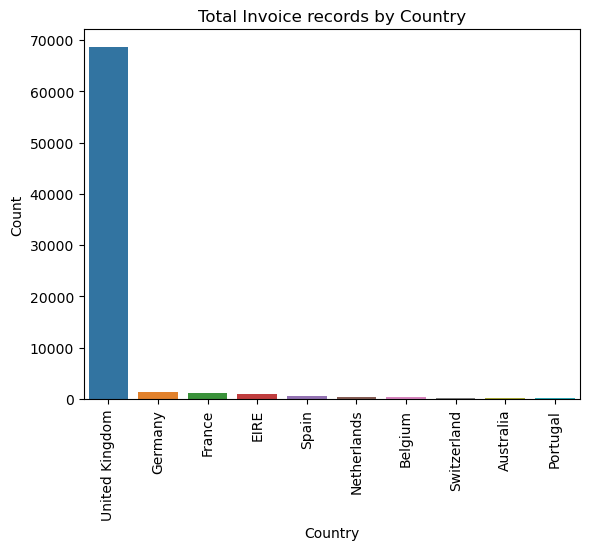

In [8]:
country = df['Country'].value_counts().head(10).reset_index().rename(columns = {'index':'Country','Country':'Count'})
sns.barplot(data = country,x = 'Country',y = 'Count')
plt.xticks(rotation = 90)
plt.title('Total Invoice records by Country')
plt.show()

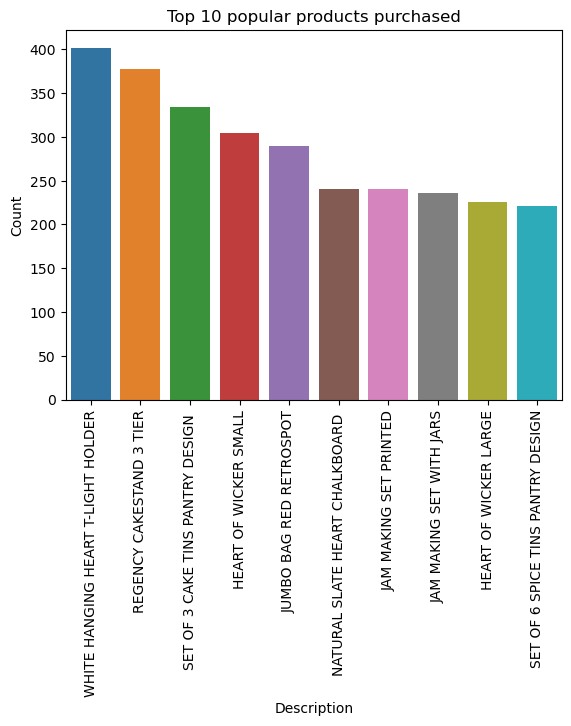

In [9]:
products = df['Description'].value_counts().head(10).reset_index().rename(columns = {'index':'Description','Description':'Count'})
sns.barplot(data = products,x = 'Description',y = 'Count')
plt.xticks(rotation = 90)
plt.title('Top 10 popular products purchased')
plt.show()

In [10]:
# evaluating records with negative quantities
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
276,C536642,21463,MIRRORED DISCO BALL,-1,2010-12-02 11:56:00,5.95,14390.0,United Kingdom
494,C536734,22780,LIGHT GARLAND BUTTERFILES PINK,-4,2010-12-02 12:50:00,4.25,16042.0,United Kingdom
495,C536734,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2010-12-02 12:50:00,7.95,16042.0,United Kingdom
502,C536737,22798,ANTIQUE GLASS DRESSING TABLE POT,-2,2010-12-02 13:05:00,2.95,15922.0,United Kingdom
870,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
75001,556012,15044B,NaN,-27,2011-06-08 11:45:00,0.00,NaN,United Kingdom
75002,C556011,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,-6,2011-06-08 11:45:00,0.83,14475.0,United Kingdom
75003,556013,21662,NaN,-17,2011-06-08 11:46:00,0.00,NaN,United Kingdom
75004,556014,37476,NaN,-3,2011-06-08 11:46:00,0.00,NaN,United Kingdom


In [11]:
df[df['Quantity'] < 0]['Description'].value_counts()

REGENCY CAKESTAND 3 TIER               44
Manual                                 23
JAM MAKING SET WITH JARS               18
STRAWBERRY CERAMIC TRINKET BOX         16
POSTAGE                                15
                                       ..
BLUE GEISHA GIRL                        1
MEDIUM CERAMIC TOP STORAGE JAR          1
ROUND SNACK BOXES SET OF 4 SKULLS       1
HANGING METAL HEART LANTERN             1
KNICKERBOCKERGLORY MAGNET ASSORTED      1
Name: Description, Length: 706, dtype: int64

* ***1618 records have negative quantities***
* ***Maximum records (44) with negative quantities are for 'REGENCY CAKESTAND 3 TIER'***
    * *Follwed by 'Manual' entries (23)*

In [12]:
# evaluating records with missing "Description"

missing_descr = df[df['Description'].isnull()]

In [13]:
missing_descr['Country'].value_counts()

United Kingdom    205
Name: Country, dtype: int64

In [14]:
missing_descr['UnitPrice'].describe()

count    205.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: UnitPrice, dtype: float64

In [15]:
missing_descr['CustomerID'].value_counts()

Series([], Name: CustomerID, dtype: int64)

* ***Records with missing description***
    * *All records are for UK customers*
    * *All records have UnitPrice 'zero'*
    * *'CustomerID' is also missing for these records*

In [16]:
# evaluating records with missing "CustomerID"

missing_id = df[df['CustomerID'].isnull()]

In [17]:
missing_id['Country'].value_counts(normalize = True)

United Kingdom    0.992939
EIRE              0.004348
Hong Kong         0.002118
Israel            0.000520
Bahrain           0.000074
Name: Country, dtype: float64

In [18]:
missing_id['UnitPrice'].describe()

count    26908.000000
mean         8.598809
std        194.340305
min          0.000000
25%          1.630000
50%          3.290000
75%          5.380000
max      16888.020000
Name: UnitPrice, dtype: float64

In [19]:
missing_id['Quantity'].describe()

count    26908.000000
mean         2.785566
std         46.056018
min      -2600.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5568.000000
Name: Quantity, dtype: float64

In [20]:
missing_id['Description'].value_counts()

DOTCOM POSTAGE                         144
JUMBO BAG RED RETROSPOT                 90
RECYCLING BAG RETROSPOT                 79
SMALL POPCORN HOLDER                    75
HEART OF WICKER SMALL                   71
                                      ... 
AMETHYST CHUNKY BEAD BRACELET W STR      1
PINK MONTE CARLO HANDBAG                 1
ASS COLOUR GLOWING TIARAS                1
NUMBER TILE VINTAGE FONT 7               1
SILVER BLACK ORBIT DROP EARRINGS         1
Name: Description, Length: 2439, dtype: int64

* ***Maximum records with missing CustomerID are from UK (99.29%)***
    * *Followed by EIRE (0.4%),HongKong(0.2%),Israel*
* ***Assumption: Records with negative quantities can be return products.***

### Data Preprocessing

* ***1.Columns StockCode,Description,Country are not important for this use case of segmentation on the basis of RFM***
    * *Dropping these columns*

In [21]:
df2 = df.drop(columns = ['StockCode','Description','Country'])

* ***2.Records with missing CustomerID are of no importance.***
    * *CustomerID is critical to segment the customers.We cannot impute the missing values in this particular case.*
    * *Dropping the records with missing CustomerID.*

In [22]:
df2.dropna(subset = ['CustomerID'],inplace = True)

In [23]:
df2.shape

(48212, 5)

* ***3.Assuming the records with negative quantities are return items,***
    * *Replacing the negative quantities with '0'*

In [24]:
df2['Quantity'] = np.where(df2['Quantity'] < 0,0,df2['Quantity'])

* ***4.Creating total price column***
    * *Dropping Quantity & UnitPrice columns*

In [25]:
df2['Total'] = df2['Quantity'] * df2['UnitPrice']

In [26]:
df3 = df2.drop(columns =['Quantity','UnitPrice'])

* ***4.Aggregating the total invoice amount for each Invoice***

In [27]:
# Getting the sum of total invoice amount for each Invoice
df4 = df3.groupby('InvoiceNo')['Total'].sum().reset_index()

In [28]:
# Dropping duplicated rows for invoice
df3_new = df3.drop('Total',axis = 1).drop_duplicates(subset = ['InvoiceNo'])

In [29]:
df5 = pd.merge(df3_new,df4,on = 'InvoiceNo',how = 'left')

In [30]:
df5.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,217.80
1,536628,2010-12-02 10:54:00,17850.0,230.56
2,536629,2010-12-02 10:55:00,17850.0,22.20
3,536630,2010-12-02 10:56:00,17850.0,244.46
4,536631,2010-12-02 10:58:00,17850.0,22.20


* ***5.Identifying patterns based on Invoice day,month,week,hour,etc.***

In [110]:
# Checking pattern on the basis of day,week,hour,etc.
df5['Month_name'] = df5['InvoiceDate'].dt.month_name()
df5['Month'] = df5['InvoiceDate'].dt.month
df5['Day'] = df5['InvoiceDate'].dt.day
df5['Hour'] = df5['InvoiceDate'].dt.hour
df5['Week'] = df5['InvoiceDate'].dt.week
df5['Weekday_name'] = df5['InvoiceDate'].dt.day_name()
df5['Weekday'] = df5['InvoiceDate'].dt.dayofweek

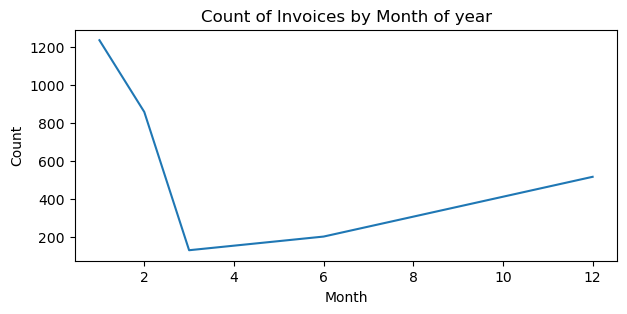

In [33]:
plt.figure(figsize = (7,3))
month_count = df5['Month'].value_counts().reset_index().rename(columns ={'index':'Month','Month':'Count'}).sort_values('Month')
sns.lineplot(data = month_count,x = 'Month',y='Count')
plt.title('Count of Invoices by Month of year')
plt.show()

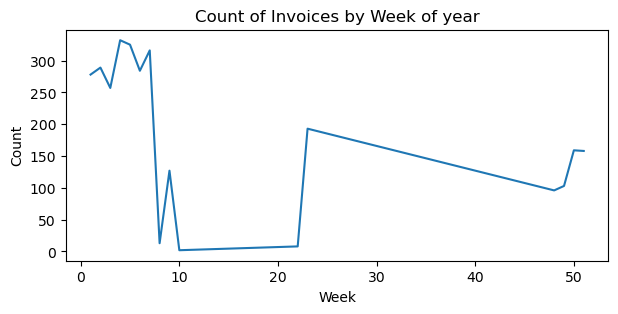

In [34]:
plt.figure(figsize = (7,3))
week_count = df5['Week'].value_counts().reset_index().rename(columns ={'index':'Week','Week':'Count'}).sort_values('Week')
sns.lineplot(data = week_count,x = 'Week',y='Count')
plt.title('Count of Invoices by Week of year')
plt.show()

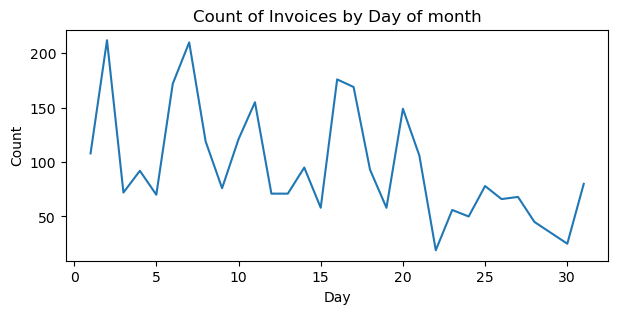

In [35]:
plt.figure(figsize = (7,3))
day_count = df5['Day'].value_counts().reset_index().rename(columns ={'index':'Day','Day':'Count'}).sort_values('Day')
sns.lineplot(data = day_count,x = 'Day',y='Count')
plt.title('Count of Invoices by Day of month')
plt.show()

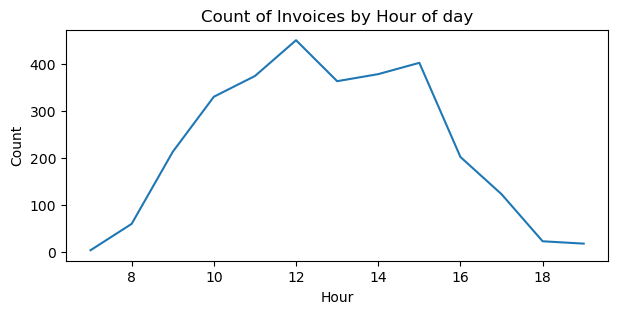

In [36]:
plt.figure(figsize = (7,3))
hour_count = df5['Hour'].value_counts().reset_index().rename(columns ={'index':'Hour','Hour':'Count'}).sort_values('Hour')
sns.lineplot(data = hour_count,x = 'Hour',y='Count')
plt.title('Count of Invoices by Hour of day')
plt.show()

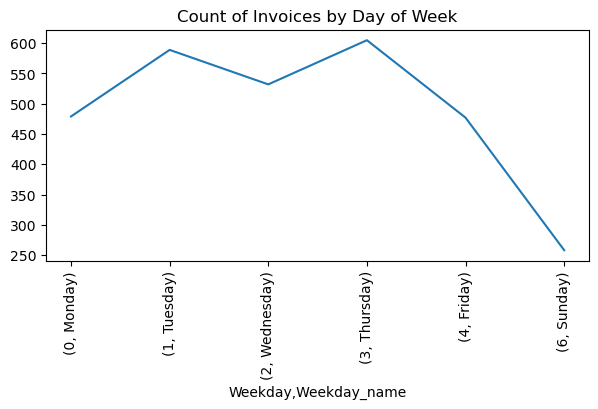

In [111]:
plt.figure(figsize = (7,3))
df5[['Weekday_name','Weekday']].groupby(['Weekday', 'Weekday_name']).value_counts().sort_index().plot(kind='line', legend=None)
plt.title('Count of Invoices by Day of Week')
plt.xticks(rotation = 90)
plt.show()

* ***6.Calculating the Recency,Frequeny & Monetary for a customer.***
    * *Based on EDA, the latest invoice date in the dataset is 08-Jun-2011*
    * *Setting 10-Jun-2011 as a benchmark to calculate the recency*

In [37]:
import datetime as dt
latest_date = dt.datetime(2011,6,10)
latest_date

datetime.datetime(2011, 6, 10, 0, 0)

In [38]:
print(latest_date)

2011-06-10 00:00:00


In [39]:
rfm_score = df5.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date - x.max()).days,
                                     'InvoiceNo':lambda x: x.count(),
                                     'Total':lambda x:x.sum()
                                    }).reset_index()

In [40]:
rfm_score.rename(columns = {'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'Monetary'},inplace = True)

In [41]:
rfm_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15


* ***7.Setting benchmarks for RFM scoring and rating the R,F & M scores***
    * *Recency - For most recent i.e <0.25 percentile setting a high score i.e 4 and accordingly the rest.*
    * *Frequency - Setting a high score (4) for most frequent i.e >0.75 percentile and accordingly the rest.*
    * *Monetary - Setting a high score (4) for most monetary i.e >0.75 percentile and accordingly the rest.*

In [42]:
quantiles = rfm_score.quantile([0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,13748.50,112.0,1.0,181.3375
0.50,15172.50,126.0,1.0,340.6050
0.75,16781.25,142.0,2.0,717.0300


In [43]:
def R_scoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def F_M_scoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [44]:
rfm_score['R'] = rfm_score['Recency'].apply(R_scoring,args = ('Recency',quantiles))
rfm_score['F'] = rfm_score['Frequency'].apply(F_M_scoring,args = ('Frequency',quantiles))
rfm_score['M'] = rfm_score['Monetary'].apply(F_M_scoring,args = ('Monetary',quantiles))

In [45]:
rfm_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,142,2,77183.60,2,3,4
1,12347.0,134,1,475.39,2,1,3
2,12348.0,135,2,1120.24,2,3,4
3,12350.0,127,1,334.40,2,1,2
4,12352.0,100,5,1281.15,4,4,4


### Customer Segmentation

* ***1.Grouping the customers based on total RFM score***
    * Getting the total RFM score
    * Labelling the customers as Silver<Gold<Diamond<Platinum based on total RFM score percentiles

In [46]:
rfm_score['RFM_sum'] = rfm_score[['R','F','M']].sum(axis = 1)

In [47]:
loyalty = ['Silver','Gold','Diamond','Platinum']
score_cuts = pd.qcut(rfm_score.RFM_sum,q = 4,labels = loyalty)
rfm_score['RFM_loyalty'] = score_cuts.values

In [48]:
rfm_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyalty
0,12346.0,142,2,77183.60,2,3,4,9,Diamond
1,12347.0,134,1,475.39,2,1,3,6,Gold
2,12348.0,135,2,1120.24,2,3,4,9,Diamond
3,12350.0,127,1,334.40,2,1,2,5,Silver
4,12352.0,100,5,1281.15,4,4,4,12,Platinum


In [49]:
rfm_score['RFM_loyalty'].value_counts()

Silver      472
Gold        361
Platinum    330
Diamond     265
Name: RFM_loyalty, dtype: int64

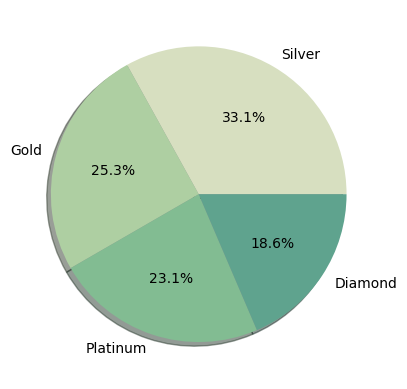

In [50]:
colors = sns.cubehelix_palette(8, start=.5, rot=-.75)
labels = rfm_score['RFM_loyalty'].value_counts().index
plt.pie(rfm_score['RFM_loyalty'].value_counts(),shadow = True,colors = colors,labels = labels,autopct = '%.1f%%')
plt.show()

* ***2.Grouping Customers based on RFM codes***
    * *Creating RFM_ID*
    * Customer Segment descriptions:
        1. Passerby customers - Customers who are not after anything in particular. only buy what might catch their attention.
        2. Loyal customers - customers who shop regularly and love this shopping mall
        3. New customers - customers who enjoy their last visit to shop and may come back if they find out more about what this mall has to offer
        4. Out-of-town customers - They were once loyal customers, but they move to new place and find a closer shopping mall
        5. Students - Customers who visit the store often but they dont spend much
        6. Dissatisfied customers - They spend a lot on shopping, but the previous purchase didnt suit them
        7. Soon-to-be loyal customers - they are 'soon-to-be' loyal customers if the previous purchase suited them and the mall catches their attention

In [51]:
rfm_score['RFM_ID'] = rfm_score['R'].map(str) + rfm_score['F'].map(str) + rfm_score['M'].map(str)

In [52]:
cust_seg = {r'[1-2][1-2][1-2]':'Passerby customers',
           r'[3-4][3-4][3-4]':'Loyal customers',
           r'[3-4][1-2][1-2]':'New customers',
           r'[1-2][3-4][1-4]':'out-of-town customers',
           r'[3-4][3-4][1-2]':'Students',
           r'[1-2][1][3-4]':'Dissatisfied customers',
           r'[3-4][1][3-4]':'Soon-to-be loyal customer'}

rfm_score['Segment'] = rfm_score['RFM_ID'].replace(cust_seg,regex = True)
rfm_score['Segment'].value_counts()

Passerby customers           353
Loyal customers              327
New customers                219
out-of-town customers        212
Dissatisfied customers       144
Soon-to-be loyal customer    104
Students                      69
Name: Segment, dtype: int64

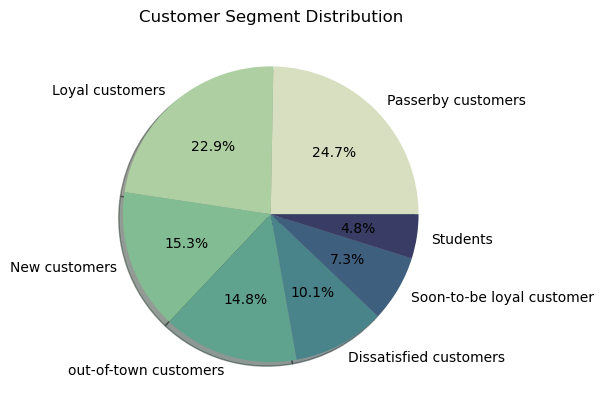

In [53]:
colors = sns.cubehelix_palette(8, start=.5, rot=-.75)
labels = rfm_score['Segment'].value_counts().index
plt.pie(rfm_score['Segment'].value_counts(),shadow = True,colors = colors,labels = labels,autopct = '%.1f%%')
plt.title('Customer Segment Distribution')
plt.show()